In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv('./sales_data_sample.csv',encoding='ISO-8859-1')

In [5]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
features=df[['QUANTITYORDERED','SALES']]

In [17]:
scaler=StandardScaler()
scaled_features= scaler.fit_transform(features)

In [21]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

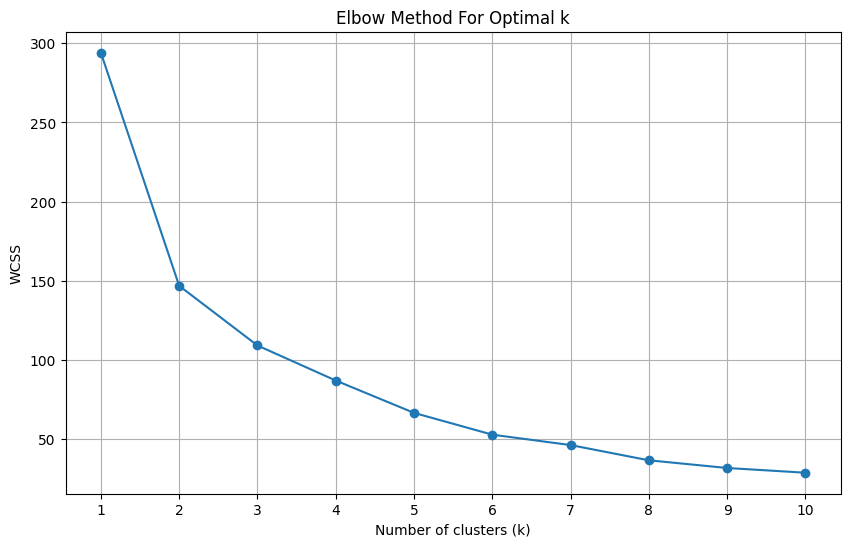

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [26]:
optimal_k=3
kmeans=KMeans(n_clusters=optimal_k, random_state=42)
clusters=kmeans.fit_predict(scaled_features)
df['Cluster']=clusters
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Cluster
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,...,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,1
21,10361,20,72.55,13,1451.00,12/17/2004 0:00,Shipped,4,12,2004,...,Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small,0
40,10270,21,100.00,9,4905.39,7/19/2004 0:00,Shipped,3,7,2004,...,Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium,0
47,10347,30,100.00,1,3944.70,11/29/2004 0:00,Shipped,4,11,2004,...,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,0
51,10391,24,100.00,4,2416.56,03-09-2005 00:00,Shipped,1,3,2005,...,Level 15,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,Small,0


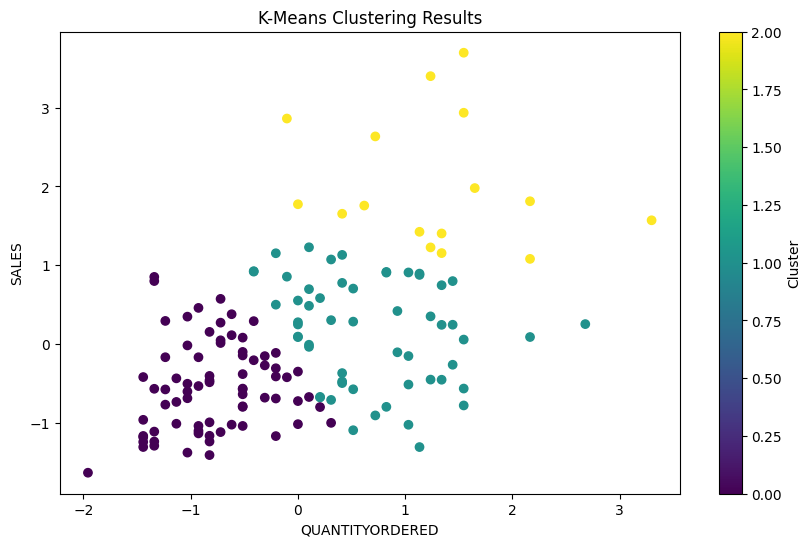

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(scaled_features[:,0],scaled_features[:,1],c=clusters,cmap='viridis',marker='o')
plt.title('K-Means Clustering Results')
plt.xlabel('QUANTITYORDERED')
plt.ylabel('SALES')
plt.colorbar(label='Cluster')
plt.show()